<a href="https://colab.research.google.com/github/ffabi/AssettoCorsaSelfDriving/blob/master/AssettoCorsaSelfDriving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract
import tesserocr
import keras
from keras.preprocessing.image import img_to_array, ImageDataGenerator
import random
from tensorflow import set_random_seed

In [0]:
np.random.seed(1234)
set_random_seed(1234)

#Connect to google drive

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

#change working directory to google drive
import os
os.chdir("gdrive/My Drive/AssettoCorsaSelfDriving")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [290]:
!unzip original.zip

Archive:  original.zip
  inflating: Assetto Corsa 2019-01-06 14-58-01.mp4  


In [0]:
!mv *.mp4 videostream.mp4

In [459]:
!ls

firstframe.png	frame_0.png  frames  log.txt  original.zip  videostream.mp4


In [0]:
startframe = 153
endframe = 2284

In [0]:
cap = cv2.VideoCapture('videostream.mp4')

for i in range(startframe):
    cap.read()

In [0]:
framecounter=0

while framecounter < endframe - startframe:
    ret, frame = cap.read()
    cropped = frame[250:]
    cv2.imwrite("frames/frame_" + str(framecounter) + ".png", cropped)
    framecounter += 1

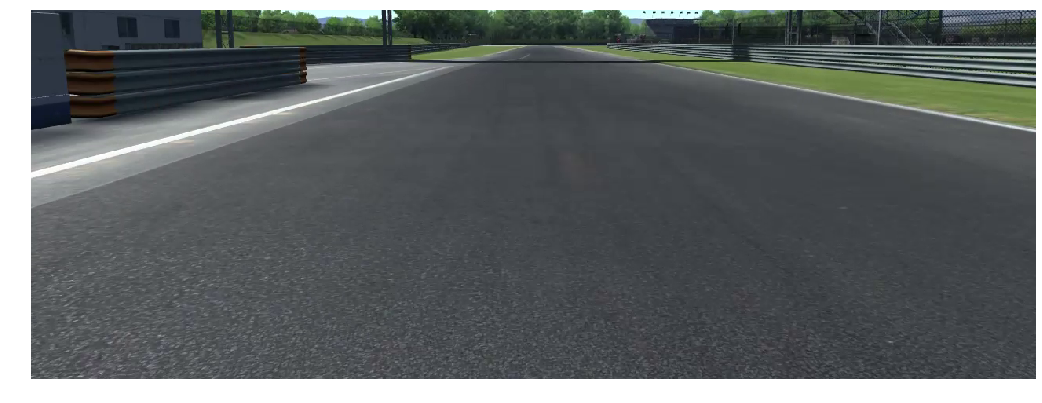

In [411]:
ret, frame = cap.read()

bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
fig=plt.figure(figsize=(18, 10))

plt.imshow(bgr[250:])
plt.axis('off')
plt.show()

In [0]:
dataset = np.zeros((framecounter, ), dtype=[('steer', np.float32), ('brake', np.float32), ("gas", np.float32), ("frame", np.int16)])

In [0]:
metafile = open("log.txt")

for i in range(framecounter):
    values = metafile.readline().split(";")
    
    steer = values[0]
    brake = values[1]
    gas = values[2]
    
    dataset[i]["steer"] = steer
    dataset[i]["brake"] = brake
    dataset[i]["gas"] = gas
    dataset[i]["frame"] = i
    
    #the metafile contains an additional line
    metafile.readline()

metafile.close()

In [455]:
dataset

array([(-2.2473795, 0., 1.,    0), (-2.308914 , 0., 1.,    1),
       (-2.7570264, 0., 1.,    2), ..., (-2.8505955, 0., 1., 2128),
       (-2.8630824, 0., 1., 2129), (-2.8000185, 0., 1., 2130)],
      dtype=[('steer', '<f4'), ('brake', '<f4'), ('gas', '<f4'), ('frame', '<i2')])

In [0]:
np.random.shuffle(dataset)

In [457]:
dataset

array([(-8.5801628e+01, 0.       , 0.06172612,  706),
       ( 3.6714840e+01, 0.       , 1.        ,  832),
       ( 6.0170341e-01, 0.       , 1.        , 1008), ...,
       (-2.3389149e+01, 0.6608351, 0.        ,  664),
       ( 4.2227246e-02, 0.       , 1.        , 1318),
       (-1.6520876e+01, 0.       , 1.        ,  723)],
      dtype=[('steer', '<f4'), ('brake', '<f4'), ('gas', '<f4'), ('frame', '<i2')])

In [0]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, batch_size=10, dim=(1280, 720, 3), shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim), dtype=float)
        Y = np.empty((self.batch_size, *(3)), dtype=float)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            img = img_to_array(load_img('frames/frame_' + str(ID) + '.png'))
            img = img/255
            
            
            # Store sample
            X[i,] = img

            # Store class
            Y[i,] = 

        return X, Y